In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,Input
import matplotlib.pyplot as plt
from keras.models import Sequential
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.callbacks import Callback , EarlyStopping
from livelossplot import PlotLossesKeras 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model



In [2]:
data_dir = r"C:\Base_Camp\Pliki\archive"
train_dir = r"C:\Base_Camp\Pliki\archive\train"
test_dir = r"C:\Base_Camp\Pliki\archive\test"
datagen = ImageDataGenerator(rescale = 1.0/255.0, validation_split = 0.2)

In [3]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
model = Sequential([
    Input(shape=(64,64, 3)),
    Conv2D(32, (3, 3), activation='relu' ),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    
    Conv2D(64, (3, 3), activation='relu' ,padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    Conv2D(256, (3, 3), activation='relu' ,padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25), 

    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,706,535 (6.51 MB)

 Trainable params: 1,703,591 (6.50 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [9]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])


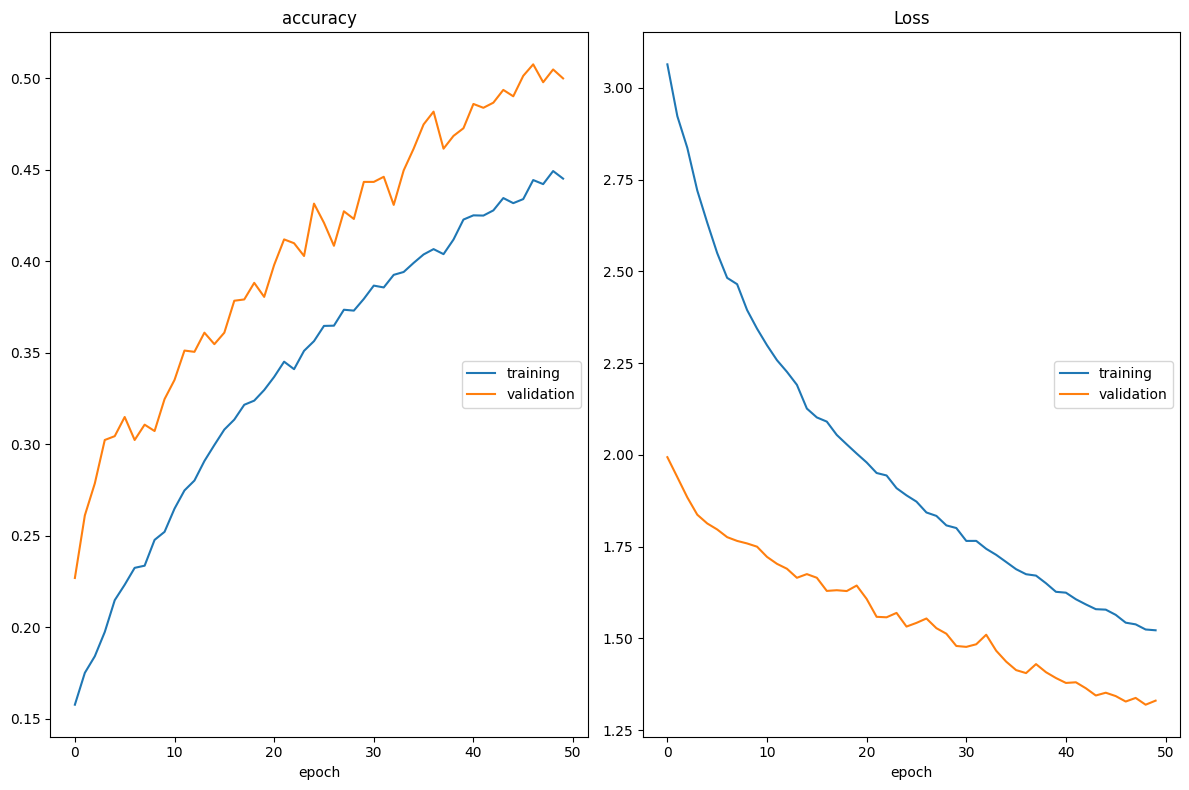

accuracy
	training         	 (min:    0.158, max:    0.449, cur:    0.445)
	validation       	 (min:    0.227, max:    0.508, cur:    0.500)
Loss
	training         	 (min:    1.522, max:    3.064, cur:    1.522)
	validation       	 (min:    1.319, max:    1.994, cur:    1.331)
718/718 ━━━━━━━━━━━━━━━━━━━━ 69s 96ms/step - accuracy: 0.4517 - loss: 1.5106 - val_accuracy: 0.5000 - val_loss: 1.3305


In [11]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_generator,
        epochs=50,
        callbacks=[PlotLossesKeras(), EarlyStopping(monitor='val_loss', patience=5, verbose=0)],
        validation_data=validation_generator
    )

In [12]:
model.evaluate(train_generator,validation_generator, verbose=0)

ValueError: When providing `x` as a PyDataset, `y` should not be passed. Instead, the targets should be included as part of the PyDataset.

In [16]:
model.save(r'C:\Base_Camp\Pliki\emotion_model.h5')

In [11]:
model = load_model(r'C:\Base_Camp\Pliki\emotion_model.h5')

In [13]:


emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def predict_emotion(face_image, model):
    face_image = cv2.resize(face_image, (48, 48))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_GRAY2RGB)  
    face_image = face_image / 255.0
    face_image = np.expand_dims(face_image, 0) 
    predictions = model.predict(face_image)
    return emotion_labels[np.argmax(predictions)]

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        emotion = predict_emotion(face, model)
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    cv2.imshow('Emotion Recognition', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1024, but received input with shape (1, 256)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 48, 48, 3), dtype=float32)
  • training=False
  • mask=None